## Imports & Reading in data

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

main_df = pd.read_csv('../data/cleaned_energy_data.csv')
world_index = main_df[main_df['country']=='World'].index
main_df_eda = main_df.drop(index=world_index).copy()

In [2]:
# making dummy columns for landlocked and nuclear countries
landlocked = ['Afghanistan', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Bhutan',
              'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Central African Republic', 'Chad',
              'Czech Republic','Eswatini', 'Ethiopia', 'Hungary', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
              'Lesotho', 'Liechtenstein','Luxembourg', 'Malawi', 'Mali', 'Moldova', 'Mongolia',
              'Nepal', 'Niger', 'North Macedonia', 'Paraguay','Rwanda', 'San Marino', 'Serbia',
              'Slovakia', 'South Sudan', 'Switzerland', 'Tajikistan','Turkmenistan', 'Uganda',
              'Uzbekistan', 'Vatican City', 'Zambia', 'Zimbabwe']

nuclear = ['Argentina', 'Armenia', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'China',
           'Czech Republic', 'Finland', 'France', 'Germany', 'Hungary', 'India', 'Iran', 'Japan',
           'Kazakhstan', 'Lithuania', 'Mexico', 'Netherlands', 'Pakistan', 'Romania', 'Russia',
           'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
           'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States']

least_developed = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Burkina Faso',
                   'Burundi', 'Cambodia', 'Central African Republic', 'Chad', 'Comoros',
                   'Congo-Brazzaville', 'Congo-Kinshasa', 'Djibouti', 'Ethiopia', 'Gambia, The',
                   'Guinea', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Laos',  'Lesotho', 'Liberia',
                   'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Nepal',
                   'Niger', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
                   'Solomon Islands', 'Somalia', 'Sudan', 'Togo', 'Uganda', 'Tanzania', 'Yemen',
                   'Zambia']

oil_exporters = ['Algeria', 'Angola', 'Congo-Brazzaville', 'Equatorial Guinea', 'Gabon', 'Iran',
                 'Iraq', 'Kuwait', 'Libya', 'Nigeria', 'Saudi Arabia', 'United Arab Emirates',
                 'Venezuela', 'United States', 'Russia', 'China']

opec = ['Algeria', 'Angola', 'Congo-Brazzaville', 'Equatorial Guinea', 'Gabon', 'Iran', 'Iraq',
        'Kuwait', 'Libya', 'Nigeria', 'Saudi Arabia', 'United Arab Emirates','Venezuela']

main_df_eda['is_landlocked'] = main_df_eda['country'].map(lambda x: 1 if x in landlocked else 0)
main_df_eda['is_nuclear'] = main_df_eda['country'].map(lambda x: 1 if x in nuclear else 0)
main_df_eda['is_least_developed'] = main_df_eda['country'].map(lambda x: 1 if x in least_developed else 0)
main_df_eda['is_oil_exporter'] = main_df_eda['country'].map(lambda x: 1 if x in oil_exporters else 0)
main_df_eda['is_opec'] = main_df_eda['country'].map(lambda x: 1 if x in opec else 0)

In [16]:
def comparison_plots(dummy_var, column):
    if not dummy_var.startswith('is_'):
        pass
    if (column.startswith('is_')) | (column == 'year') | (column == 'country'):
        pass
    
    ylabels_dict = {'population':'Thousands','life_expectancy':'Years','ppp_2015USD':'Billions in 2015USD',
                'consumption_per_capita':'Million British Thermal Units Per Capita',
                'consumption_per_GDP':'Thousand British Thermal Units Per 2015$ GDP PPP',
                'production_total':'Quadrillion British Thermal Units',
                'production_coal':'Quadrillion British Thermal Units',
                'production_natural_gas':'Quadrillion British Thermal Units',
                'production_petrolium_and_other_liquids':'Quadrillion British Thermal Units',
                'production_nuclear':'Quadrillion British Thermal Units',
                'production_nuclear_renewables_and_other':'Quadrillion British Thermal Units',
                'production_renewables_and_other':'Quadrillion British Thermal Units',
                'consumption_total':'Quadrillion British Thermal Units',
                'consumption_coal':'Quadrillion British Thermal Units',
                'consumption_natural_gas':'Quadrillion British Thermal Units',
                'consumption_petrolium_and_other_liquids':'Quadrillion British Thermal Units',
                'consumption_nuclear':'Quadrillion British Thermal Units',
                'consumption_nuclear_renewables_and_other':'Quadrillion British Thermal Units',
                'consumption_renewables_and_other':'Quadrillion British Thermal Units',
                'imports_crude_oil':'Thousand Barrels Per Day',
                'imports_natural_gas':'Billion Cubic Feet',
                'imports_coal':'Million Short Tons',
                'imports_electricity':'Billion kilowatt-hour',
                'exports_crude_oil':'Thousand Barrels Per Day',
                'exports_natural_gas':'Billion Cubic Feet',
                'exports_coal':'Million Short Tons',
                'exports_electricity':'Billion Kilowatt-Hour',
                'emissions_co2_emissions':'Million Tons CO2',
                'emissions_coal_and_coke':'Million Tons CO2',
                'emissions_consumed_natural_gas':'Million Tons CO2',
                'emissions_petroleum_and_other_liquids':'Million Tons CO2'}
    
    is_group = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[1,column]
    is_not_group = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[0,column]
    is_group.plot(figsize=(9,6), grid=True, label=dummy_var+'_1')
    is_not_group.plot(figsize=(9,6), grid=True, label=dummy_var+'_0')
    plt.title(label=column.replace('_',' ').title(), fontdict={'size':24})
    plt.xlabel(xlabel='Year', fontdict={'size':18})
    plt.xticks(list(range(1992,2018,2)))
    plt.ylabel(ylabel= ylabels_dict[column], fontdict={'size':18})
    plt.legend()

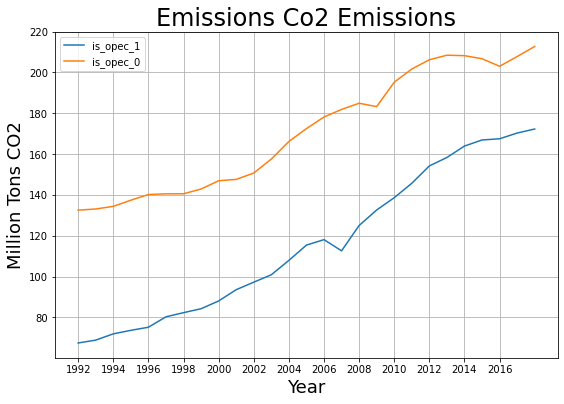

In [34]:
comparison_plots('is_opec','emissions_co2_emissions')

In [168]:
# graph attempt 1
def get_grouped_plots(dummy_var, dummy_var_value):
    
    cols = list(main_df_eda.columns)
    
    # dataframes for population, ppp, life_exp, consumption_per_capita/GDP
    df_pop = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[2]]]
    df_ppp = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[6]]]
    df_life_exp = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[3]]]
    df_cons_per_cap = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[4]]]
    df_cons_per_ppp = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[5]]]
    
    # dataframes for consumption/production, import/export, emissions 
    df_total = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[7],cols[14]]]
    df_coal = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[8],cols[15]]]
    df_nat_gas = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[9],cols[16]]]
    df_petr = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[10],cols[17]]]
    df_nuc = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[11],cols[18]]]
    df_nuc_renew = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[12],cols[19]]]
    df_renew = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[13],cols[20]]]
    df_impexp_crude = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[21],cols[25]]]
    df_impexp_nat_gas = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[22],cols[26]]]
    df_impexp_coal = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[23],cols[27]]]
    df_impexp_elec = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),[cols[24],cols[28]]]
    df_em_co2 = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),cols[29]]
    df_em_coal = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),cols[30]]
    df_em_nat_gas = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),cols[31]]
    df_em_petr = main_df_eda.groupby([str(dummy_var),'year']).mean().loc[(dummy_var_value,),cols[32]]
    
    # define number of rows and columns for subplots
    nrow=10
    ncol=2                                                                 

    # make a list of all dataframes
    df_list = [df_pop, df_ppp, df_life_exp, df_cons_per_cap, df_cons_per_ppp, df_total, df_coal,
               df_nat_gas, df_petr, df_nuc, df_nuc_renew, df_renew, df_impexp_crude, df_impexp_nat_gas,
               df_impexp_coal, df_impexp_elec, df_em_co2, df_em_coal, df_em_nat_gas, df_em_petr]
                                                                         
    fig, axes = plt.subplots(nrow, ncol)

    # plot counter
    count=0
    for r in range(nrow):
        for c in range(ncol):
            
            df_list[count].plot(kind='line', ax=axes[r,c], figsize=(40,40));
            count+=1

get_grouped_plots('is_nuclear',1)            